In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # estymator klasyfikacji=klasyfikator
from sklearn.model_selection import train_test_split # podział na zbiór testowy i treningowy
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score,plot_roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix # podsumowanie klasyfikacji
from sklearn.decomposition import PCA # analiza głównych składowych - w celu redukcji wymiarowości danych
from scipy import signal
import scipy
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
df_rm=pd.read_csv("df_rm.csv")

In [3]:
df_rm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [4]:
df_rm.shape

(1232, 12)

In [5]:
df_rm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,8.303328,0.524144,0.266266,2.376948,0.081702,15.185877,44.353896,0.996673,3.313360,0.642192,10.425785,0.137175
std,1.649113,0.171969,0.190753,0.823759,0.022433,9.335015,30.051752,0.001714,0.140937,0.129924,1.038477,0.344172
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.636250,0.420000,2.600000,0.089000,21.000000,60.000000,0.997800,3.400000,0.710000,11.100000,0.000000
max,13.500000,1.070000,0.790000,6.550000,0.236000,47.000000,147.000000,1.002200,3.750000,1.170000,13.600000,1.000000


In [6]:
X = df_rm.drop("quality", axis=1)
y = df_rm["quality"]

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (985, 11)
Shape of X_test:  (247, 11)
Shape of y_train:  (985,)
Shape of y_test (247,)


Feature Scaling

In [9]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [10]:
model=LogisticRegression().fit(X_train,y_train)

In [11]:
model.coef_

array([[ 0.48189569, -0.45853787, -0.18694313,  0.26067398, -0.23052756,
         0.01023646, -0.4482679 , -0.51982741, -0.13548556,  0.82193096,
         0.79602089]])

In [12]:
model.intercept_

array([-2.92122481])

##### Ocena jakości modelu na danych treningowych

In [13]:
pred_train=model.predict(X_train)

In [14]:
pred_train_proba=model.predict_proba(X_train)[:,1]

In [15]:
accuracy_score(y_train,pred_train)

0.8903553299492386

In [16]:
roc_auc_score(y_train,pred_train_proba)

0.8897058823529411

In [17]:
confusion_matrix(y_train,pred_train)

array([[821,  28],
       [ 80,  56]], dtype=int64)

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


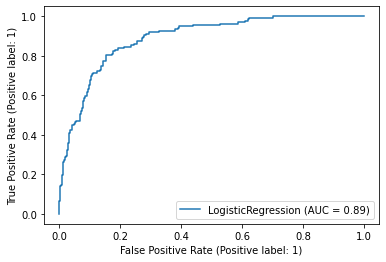

In [18]:
plot_roc_curve(model,X_train,y_train)

##### Ocena jakości modelu na danych testowych

In [19]:
pred_test=model.predict(X_test)
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [20]:
pred_test_proba=model.predict_proba(X_test)[:,1]
pred_test_proba

array([0.02961376, 0.02191175, 0.00808769, 0.03809788, 0.01340242,
       0.17003054, 0.02196186, 0.013009  , 0.03912261, 0.01251476,
       0.00492283, 0.06930896, 0.18606432, 0.00484878, 0.61564051,
       0.15070776, 0.06048448, 0.32578559, 0.08968505, 0.01590153,
       0.00464994, 0.16206161, 0.01613844, 0.23828435, 0.0378497 ,
       0.0194947 , 0.19004178, 0.082715  , 0.02784573, 0.01361575,
       0.00578037, 0.15897055, 0.00927328, 0.34347832, 0.21722845,
       0.00308169, 0.01168207, 0.00155901, 0.35082966, 0.00294653,
       0.31466417, 0.6625769 , 0.00449675, 0.40354518, 0.01717298,
       0.00935361, 0.01959991, 0.20544136, 0.03668661, 0.00548556,
       0.72236561, 0.10378293, 0.07416819, 0.01462889, 0.93755635,
       0.03916153, 0.01428853, 0.17544085, 0.24341288, 0.68067628,
       0.30441759, 0.82017806, 0.36905537, 0.30356696, 0.21891504,
       0.71545266, 0.26293168, 0.09329561, 0.04379202, 0.02484637,
       0.01420843, 0.05772025, 0.0104068 , 0.00796601, 0.03884

In [21]:
accuracy_score(y_test,pred_test)

0.8825910931174089

In [22]:
confusion_matrix(y_test,pred_test)

array([[206,   8],
       [ 21,  12]], dtype=int64)

In [23]:
roc_auc_score(y_test,pred_test_proba)

0.8991787029170206

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


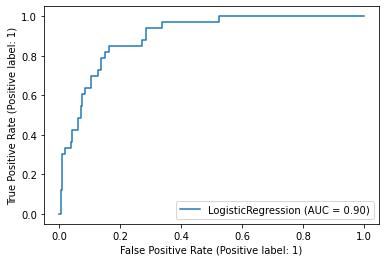

In [24]:
plot_roc_curve(model,X_test,y_test)

In [25]:
# Predicting Cross Validation Score
cv=cross_val_score(model, X_train, y_train, cv=10).mean()
print("Cross Validation Score : ", cv)

Cross Validation Score :  0.8802308802308803


##### Analiza głównych składowych

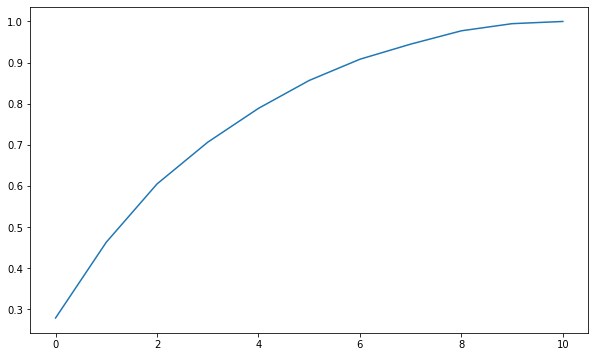

In [26]:
pca = PCA()
pca.fit_transform(X_train)
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_));

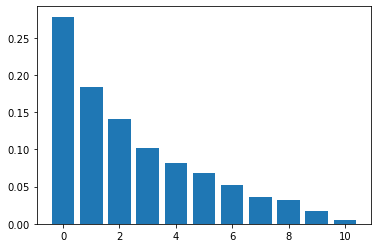

In [27]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
pass

In [28]:
pca = PCA(n_components=3, svd_solver='full')
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
pca.explained_variance_ratio_   

array([0.27871477, 0.18433349, 0.14168818])

##### Estymacja modelu klasyfikacyjnego na PCA

In [29]:
model_PCA = LogisticRegression().fit(X_pca_train, y_train)

In [30]:
X_pca_train

array([[-0.9732011 , -2.67195851,  2.27666102],
       [-0.45486742,  1.63377054, -0.97610988],
       [-1.43730764, -0.02562158, -1.15714937],
       ...,
       [-3.10897503,  3.13258106,  2.70954034],
       [ 0.34434786,  2.25688224,  0.38781026],
       [-2.40699853,  1.76325395, -0.84087729]])

In [31]:
model_PCA.coef_

array([[0.31094716, 1.10771412, 0.3835292 ]])

In [32]:
model_PCA.intercept_

array([-2.75908265])

###### Ocena jakości modelu PCA na danych treningowych

In [33]:
pred_train_PCA=model_PCA.predict(X_pca_train)

In [34]:
accuracy_score(y_train,pred_train_PCA)

0.8771573604060914

In [35]:
print(confusion_matrix(y_train,model_PCA.predict(X_pca_train)))

[[820  29]
 [ 92  44]]


###### Ocena jakości modelu PCA na zbiorze testowym

In [36]:
pred_test_PCA=model_PCA.predict(X_pca_test)

In [37]:
accuracy_score(y_test,pred_test_PCA)

0.8744939271255061

In [38]:
y_pred = model_PCA.predict(X_pca_test)
print(confusion_matrix(y_test,y_pred))

[[206   8]
 [ 23  10]]


C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


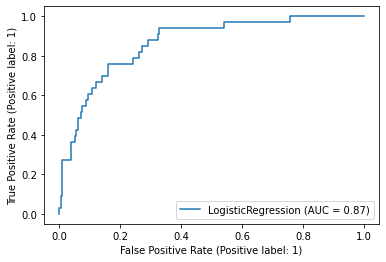

In [39]:
plot_roc_curve(model_PCA, X_pca_test, y_test)
pass

### Drzewo decyzyjne

In [40]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy',random_state=0)

In [41]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [42]:
#predykcja na danych treningowych
DT_pred=DT.predict(X_train)
acc_train=accuracy_score(y_train, DT_pred)
print('The accuracy train data is',acc_train)

The accuracy train data is 0.9035532994923858


In [43]:
#predykcja na danych testowych
DT_pred_test = DT.predict(X_test)
print('The accuracy test data is',accuracy_score( y_test, DT_pred_test))

The accuracy test data is 0.8421052631578947


In [44]:
cross_val_score(DT, X_train, y_train, cv=5)

array([0.90862944, 0.88324873, 0.86294416, 0.87817259, 0.85279188])

In [45]:
prec = precision_score(y_test, DT_pred_test)
print("The precision is {}".format(prec))
rec = recall_score(y_test, DT_pred_test)
print("The recall is {}".format(rec))
f1 = f1_score(y_test, DT_pred_test)
print("The F1-Score is {}".format(f1))

The precision is 0.3333333333333333
The recall is 0.18181818181818182
The F1-Score is 0.23529411764705885


In [46]:
print(classification_report(y_test, DT_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       214
           1       0.33      0.18      0.24        33

    accuracy                           0.84       247
   macro avg       0.61      0.56      0.57       247
weighted avg       0.81      0.84      0.82       247



In [47]:
matrix=confusion_matrix(y_test, DT_pred_test, labels = [0, 1])
matrix

array([[202,  12],
       [ 27,   6]], dtype=int64)

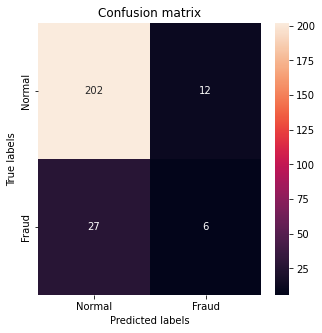

In [48]:
#Confusion Matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, DT_pred_test)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


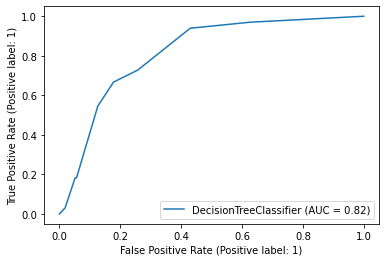

In [49]:
ROC_DT = plot_roc_curve(DT, X_test, y_test)
plt.show()

#### Użycie RandomizedSearchCV aby znaleźć dobre parametry

In [50]:
params={'criterion': ['gini', 'entropy'],
                     'max_depth': [1, 3, 5, 7, 10, None],
                     'min_samples_leaf': [1, 3, 5, 7],
                     'min_samples_split': [2, 4, 6, 8],
                     'splitter': ['best', 'random']},

In [51]:
random_search = RandomizedSearchCV(DT, param_distributions=params, cv=5, n_iter=10, scoring='accuracy', verbose=2)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=4,
                                                    random_state=0),
                   param_distributions=({'criterion': ['gini', 'entropy'],
                                         'max_depth': [1, 3, 5, 7, 10, None],
                                         'min_samples_leaf': [1, 3, 5, 7],
                                         'min_samples_split': [2, 4, 6, 8],
                                         'splitter': ['best', 'random']},),
                   scoring='accuracy', verbose=2)

In [52]:
random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 3,
 'criterion': 'gini'}

In [53]:
random_search.best_score_

0.8730964467005077

In [54]:
DT_2 = random_search.best_estimator_

In [55]:
#predykcja na danych testowych
DT_pred_2 = DT_2.predict(X_test)
print('The accuracy test data is',accuracy_score( y_test, DT_pred_2))

The accuracy test data is 0.8623481781376519


In [56]:
accuracy_score(y_test, DT_pred_2)

0.8623481781376519

In [57]:
roc_auc_score(y_test, DT_pred_2)

0.536108751062022

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


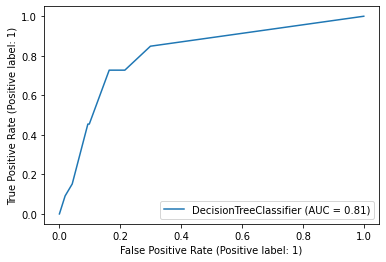

In [58]:
plot_roc_curve(DT_2, X_test, y_test)

#### GridSearchCV aby znaleźć optymalne parametry

In [59]:
params={'criterion': ['entropy'],
                     'max_depth': [3, 4],
                     'min_samples_leaf': [7, 9, 11],
                     'min_samples_split': [3,4,5],
                     'splitter': ['best']},

In [60]:
grid_search = GridSearchCV(DT, param_grid=params, cv=5, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END cr

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=0),
             param_grid=({'criterion': ['entropy'], 'max_depth': [3, 4],
                          'min_samples_leaf': [7, 9, 11],
                          'min_samples_split': [3, 4, 5],
                          'splitter': ['best']},),
             scoring='accuracy', verbose=2)

In [61]:
grid_search.best_score_

0.8873096446700508

In [62]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 11,
 'min_samples_split': 3,
 'splitter': 'best'}

In [63]:
DT_3 = grid_search.best_estimator_

In [64]:
DT_pred_3 = DT_3.predict(X_test)
print('The accuracy test data is',accuracy_score( y_test, DT_pred_3))

The accuracy test data is 0.8461538461538461


In [65]:
roc_auc_score(y_test, DT_pred_3)

0.5652081563296517

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


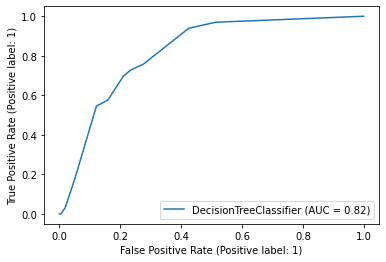

In [66]:
plot_roc_curve(DT_3, X_test, y_test)

### Las losowy

In [67]:
rfc=RandomForestClassifier(n_estimators=20,bootstrap=True,random_state=0)
rfc.fit(X_train, y_train)

yPred=rfc.predict(X_train)
yPred_test=rfc.predict(X_test)

In [68]:
print('accuracy train data is',accuracy_score(yPred,y_train))
print('accuracy test data is',accuracy_score(yPred_test,y_test))

accuracy train data is 0.9979695431472081
accuracy test data is 0.8744939271255061


In [69]:
acc = accuracy_score(y_test, yPred_test)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, yPred_test)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, yPred_test)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, yPred_test)
print("The F1-Score is {}".format(f1))

The accuracy is 0.8744939271255061
The precision is 0.5416666666666666
The recall is 0.3939393939393939
The F1-Score is 0.45614035087719296


In [70]:
print(classification_report(y_test, yPred_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       214
           1       0.54      0.39      0.46        33

    accuracy                           0.87       247
   macro avg       0.73      0.67      0.69       247
weighted avg       0.86      0.87      0.87       247



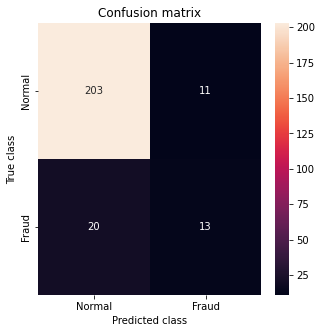

In [71]:
#Confusion Matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred_test)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


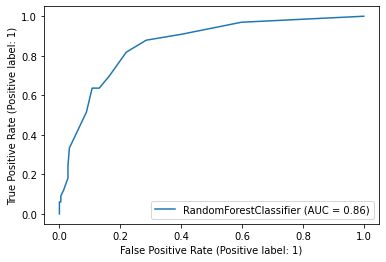

In [72]:
ROC_RF = plot_roc_curve(rfc, X_test, y_test)
plt.show()

#### RandomizedSearchCV

In [73]:
params={'criterion': ['gini', 'entropy'],
        'n_estimators': [50, 100, 150 ,200],
        'max_depth': [1, 3, 5, 7, 10, None],
        'min_samples_leaf': [1, 3, 5, 7],
        'min_samples_split': [2, 4, 6, 8]}

In [74]:
random_search = RandomizedSearchCV(rfc, param_distributions=params, n_iter=10, cv=5, scoring='accuracy')

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 3, 5, 7, 10, None],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy')

In [100]:
random_search.best_score_

0.8862944162436548

In [75]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'entropy'}

In [76]:
rfc_2 = random_search.best_estimator_

In [77]:
yPred_2 = rfc_2.predict(X_test)

In [78]:
accuracy_score(y_test, yPred_2)

0.8744939271255061

In [79]:
roc_auc_score(y_test, yPred_2)

0.645638629283489

In [80]:
random_search.cv_results_

{'mean_fit_time': array([0.12477789, 0.24126248, 0.28713574, 0.39605608, 0.13541651,
        0.13646297, 0.20340772, 0.35600443, 0.28182864, 0.23038998]),
 'std_fit_time': array([0.00791627, 0.01415052, 0.01270094, 0.02314169, 0.00257224,
        0.01254669, 0.02875632, 0.00981803, 0.01703451, 0.0210317 ]),
 'mean_score_time': array([0.00473204, 0.01552973, 0.02485399, 0.02355294, 0.00899115,
        0.00777869, 0.01460996, 0.02339439, 0.01695991, 0.01525707]),
 'std_score_time': array([0.00628079, 0.00098746, 0.00378823, 0.00501731, 0.00091162,
        0.00076439, 0.00195318, 0.00300334, 0.00407943, 0.00173758]),
 'param_n_estimators': masked_array(data=[50, 100, 150, 150, 50, 50, 100, 150, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 8, 8, 2, 8, 6, 6, 2, 8, 4],
              mask=[False, False, False, False,

In [81]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [82]:
params={'criterion': ['gini'],
        'n_estimators': [100],
        'max_depth': [7, 10, None],
        'min_samples_leaf': [2, 4],
        'min_samples_split': [6, 8]}

In [83]:
grid_search = GridSearchCV(rfc, param_grid=params, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=20, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 10, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [6, 8], 'n_estimators': [100]},
             scoring='accuracy')

In [84]:
grid_search.best_score_

0.8852707144092719

In [85]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [86]:
rfc_3 = grid_search.best_estimator_

In [87]:
yPred_3 = rfc_3.predict(X_test)

In [88]:
accuracy_score(y_test, yPred_3)

0.8825910931174089

In [89]:
roc_auc_score(y_test, yPred_3)

0.6246813933729821

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


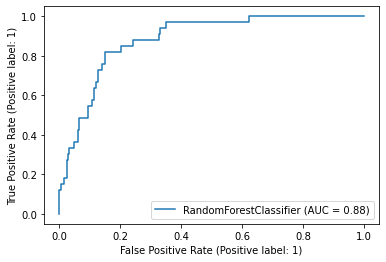

In [90]:
plot_roc_curve(rfc_3, X_test, y_test)